In [1]:
# -*- coding: utf-8 -*-
from underthesea import word_tokenize
import re
import VietnameseTextNormalizer.ReleasePython3.VietnameseTextNormalizer as nm
import pandas as pd
import numpy as np

In [2]:
# load stop words list
file = open('vietnamese-stopwords.txt')
stop_words = file.readlines()
file.close()

stop_words = set([word.strip('\n') for word in stop_words])

In [3]:
abbr_dict={
    "ko":"không",
    "hok":"không",
    "hông":"không",
    "mn":"bạn",
    "ae":"bạn",
    "bợn":"bạn",
    "vs":"với",
    "sr":"xin lỗi",
    "help":"giúp",
    "thank":"cảm ơn",
    "thanks":"cảm ơn",
    "cám ơn":"cảm ơn",
    "tks":"cảm ơn",
    "kq":"kết quả",
    "kqua":"kết quả",
    "nhe":"nhé",
    "nhá":"nhé",
    "nha":"nhé",
    "h":"giờ",
    "s":"sao",
    "pls":"",
    "plz":"",
    "me":"mình",
    "mị":"mình",
    "đc":"được",
    "dc":"được",
    "tgian": "thời gian"
}

In [4]:
def replace_abbr(t):
    if t in abbr_dict:
        return abbr_dict[t]
    else:
        return t

In [5]:
def removeConsecutiveDuplicates(S): 
    S = list(S.rstrip()) 
    
    n = len(S)  
    
    if (n < 2) : 
        return S[0]
           
    j = 0
       
    for i in range(n):  
        if (S[j] != S[i]): 
            j += 1
            S[j] = S[i]  
      
    j += 1
    S = S[:j]
    return "".join(S)

In [6]:
def preprocessing(s, show_stepbystep=False, remove_stop_words=True):
    if show_stepbystep:
        print("original:")
        print(s)
        print()
    
    # remove 'Xem thêm'
    s = re.sub('Xem thêm', '', s)
    if show_stepbystep:
        print("remove xt:")
        print(s)
        print()

    # convert to lower case
    s = s.lower()
    if show_stepbystep:
        print("lowercase:")
        print(s)
        print()
    
    # normalize Vietnamese
    s = nm.ASRNormalize(s)
    if show_stepbystep:
        print("normalized Vietnamese:")
        print(s)
        print()
    
    # abbreviate faculty name
    s = re.sub('kỹ thuật phần mềm', 'ktpm', s)
    s = re.sub('công nghệ phần mềm', 'cnpm', s)
    s = re.sub('khoa học máy tính', 'khmt', s)
    s = re.sub('hệ thống thông tin', 'httt', s)
    s = re.sub('kỹ thuật máy tính', 'ktmt', s)
    s = re.sub('thương mại điện tử', 'tmđt', s)
    s = re.sub('công nghệ thông tin', 'cntt', s)
    s = re.sub('an toàn thông tin', 'attt', s)
    s = re.sub('công tác sinh viên', 'ctsv', s)
    if show_stepbystep:
        print("abbreviate faculty name:")
        print(s)
        print()
    
    # remove urls and hashtags
    s = re.sub(r'http\S+', '', s)
    s = re.sub(r'#\S+', '', s)
    if show_stepbystep:
        print('remove urls and hashtags:')
        print(s)
        print()
    
    # remove email address
    s = re.sub(r'\S*@\S*\s?', '', s)
    if show_stepbystep:
        print('remove email addresses:')
        print(s)
        print()
    
    # split into words
    tokens = word_tokenize(s)
    if show_stepbystep:
        print('tokenize:')
        print(tokens)
        print()
    
    # remove punctuation and number
    words = [word for word in tokens if re.sub(r"\s+", "", word).isalpha()]
    if show_stepbystep:
        print('remove punctuation:')
        print(words)
        print()
    
    # remove consecutive duplicates character
    words = [removeConsecutiveDuplicates(word) for word in words]
    if show_stepbystep:
        print('remove consecutive duplicates character:')
        print(words)
        print()
    
    # replace abbreviation of word
    words = [replace_abbr(word) for word in words]
    if show_stepbystep:
        print('replace abbreviation:')
        print(words)
        print()
        
    # remove stop words
    if remove_stop_words:
        words = [word for word in words if not word in stop_words]
        if show_stepbystep:
            print('remove stop words:')
            print(words)
            print()
    
    # remove single character
    words = [word for word in words if len(word)>1]
    if show_stepbystep:
        print('remove single character:')
        print(words)
        print()
    
    return words

In [7]:
dataset = pd.read_csv('file.csv')

In [8]:
dataset

,annotation_approver,id,label,text,user
0,NaN,2,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ ...,1
1,NaN,3,1,💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn P...,1
2,NaN,4,1,Phòng Công tác Sinh viên thông tin đến sinh vi...,1
3,NaN,5,1,🔬 Các chuyên ngành đào tạo trường Đại học Kans...,1
4,NaN,6,1,👉 Bật mí với các bạn một chương trình vô cùng ...,1
...,...,...,...,...,...
9136,NaN,9138,1,Bạn này vừa đến Trường nộp Giấy kết quả thi TH...,1
9137,NaN,9139,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để ki...,1
9138,NaN,9140,3,# chào mình đỗ ktpm clc ... bác nào chung khoa...,1
9139,NaN,9141,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng...",1


In [9]:
dataset = dataset.drop(columns=['annotation_approver', 'id', 'user'])

In [10]:
dataset

,label,text
0,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ ...
1,1,💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn P...
2,1,Phòng Công tác Sinh viên thông tin đến sinh vi...
3,1,🔬 Các chuyên ngành đào tạo trường Đại học Kans...
4,1,👉 Bật mí với các bạn một chương trình vô cùng ...
...,...,...
9136,1,Bạn này vừa đến Trường nộp Giấy kết quả thi TH...
9137,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để ki...
9138,3,# chào mình đỗ ktpm clc ... bác nào chung khoa...
9139,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng..."


In [11]:
dataset['with_stop_words'] = [preprocessing(dataset.iloc[i]['text'], remove_stop_words=False) for i in range(dataset.shape[0])]

In [12]:
dataset['without_stop_words'] = [preprocessing(dataset.iloc[i]['text'], remove_stop_words=True) for i in range(dataset.shape[0])]

In [13]:
dataset['concat'] = [' '.join(dataset.iloc[i]['with_stop_words']) for i in range(dataset.shape[0])]

In [14]:
dataset

,label,text,with_stop_words,without_stop_words,concat
0,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ ...,"[tsđh, thông báo, tổ chức, lớp, ôn tập, chuẩn ...","[tsđh, thông báo, tổ chức, lớp, ôn tập, tuyển ...",tsđh thông báo tổ chức lớp ôn tập chuẩn bị tuy...
1,1,💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn P...,"[giao lưu, cùng, nhà báo, nhà thơ, nguyễn phon...","[giao lưu, nhà báo, nhà thơ, nguyễn phong việt...",giao lưu cùng nhà báo nhà thơ nguyễn phong việ...
2,1,Phòng Công tác Sinh viên thông tin đến sinh vi...,"[phòng, ctsv, thông tin, đến, sinh viên, về, t...","[phòng, ctsv, thông tin, sinh viên, làm việc, ...",phòng ctsv thông tin đến sinh viên về thời gia...
3,1,🔬 Các chuyên ngành đào tạo trường Đại học Kans...,"[các, chuyên ngành, đào tạo, trường, đại học, ...","[chuyên ngành, đào tạo, trường, đại học, kansa...",các chuyên ngành đào tạo trường đại học kansai...
4,1,👉 Bật mí với các bạn một chương trình vô cùng ...,"[bật mí, với, các, bạn, một, chương trình, vô ...","[bật mí, chương trình, vô cùng, hấp dẫn, diễn,...",bật mí với các bạn một chương trình vô cùng hấ...
...,...,...,...,...,...
9136,1,Bạn này vừa đến Trường nộp Giấy kết quả thi TH...,"[bạn, này, vừa, đến, trường, nộp, giấy, kết qu...","[trường, nộp, giấy, kết quả, thi, thpt, quốc g...",bạn này vừa đến trường nộp giấy kết quả thi th...
9137,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để ki...,"[các, em, nhỏ, nhớ, đi, nhé, chị, share, để, k...","[đi, share, kiểu, khai trương, group, share, m...",các em nhỏ nhớ đi nhé chị share để kiểu khai t...
9138,3,# chào mình đỗ ktpm clc ... bác nào chung khoa...,"[chào, mình, đỗ, ktpm, clc, bác, nào, chung, k...","[chào, đỗ, ktpm, clc, khoa, làm quen, mail, ed...",chào mình đỗ ktpm clc bác nào chung khoa làm q...
9139,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng...","[chào, các, bạn, phòng, ctsv, đã, đăng tải, hư...","[chào, phòng, ctsv, đăng tải, hướng dẫn, tân, ...",chào các bạn phòng ctsv đã đăng tải hướng dẫn ...


In [15]:
dataset = dataset.drop_duplicates(ignore_index=True, subset='concat')

In [16]:
dataset

,label,text,with_stop_words,without_stop_words,concat
0,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ ...,"[tsđh, thông báo, tổ chức, lớp, ôn tập, chuẩn ...","[tsđh, thông báo, tổ chức, lớp, ôn tập, tuyển ...",tsđh thông báo tổ chức lớp ôn tập chuẩn bị tuy...
1,1,💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn P...,"[giao lưu, cùng, nhà báo, nhà thơ, nguyễn phon...","[giao lưu, nhà báo, nhà thơ, nguyễn phong việt...",giao lưu cùng nhà báo nhà thơ nguyễn phong việ...
2,1,Phòng Công tác Sinh viên thông tin đến sinh vi...,"[phòng, ctsv, thông tin, đến, sinh viên, về, t...","[phòng, ctsv, thông tin, sinh viên, làm việc, ...",phòng ctsv thông tin đến sinh viên về thời gia...
3,1,🔬 Các chuyên ngành đào tạo trường Đại học Kans...,"[các, chuyên ngành, đào tạo, trường, đại học, ...","[chuyên ngành, đào tạo, trường, đại học, kansa...",các chuyên ngành đào tạo trường đại học kansai...
4,1,👉 Bật mí với các bạn một chương trình vô cùng ...,"[bật mí, với, các, bạn, một, chương trình, vô ...","[bật mí, chương trình, vô cùng, hấp dẫn, diễn,...",bật mí với các bạn một chương trình vô cùng hấ...
...,...,...,...,...,...
9131,1,Bạn này vừa đến Trường nộp Giấy kết quả thi TH...,"[bạn, này, vừa, đến, trường, nộp, giấy, kết qu...","[trường, nộp, giấy, kết quả, thi, thpt, quốc g...",bạn này vừa đến trường nộp giấy kết quả thi th...
9132,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để ki...,"[các, em, nhỏ, nhớ, đi, nhé, chị, share, để, k...","[đi, share, kiểu, khai trương, group, share, m...",các em nhỏ nhớ đi nhé chị share để kiểu khai t...
9133,3,# chào mình đỗ ktpm clc ... bác nào chung khoa...,"[chào, mình, đỗ, ktpm, clc, bác, nào, chung, k...","[chào, đỗ, ktpm, clc, khoa, làm quen, mail, ed...",chào mình đỗ ktpm clc bác nào chung khoa làm q...
9134,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng...","[chào, các, bạn, phòng, ctsv, đã, đăng tải, hư...","[chào, phòng, ctsv, đăng tải, hướng dẫn, tân, ...",chào các bạn phòng ctsv đã đăng tải hướng dẫn ...


In [17]:
np.where(dataset.applymap(lambda x: x == ''))

(array([4028]), array([4]))

In [18]:
dataset.iloc[4028]

label                  5
text                   0
with_stop_words       []
without_stop_words    []
concat                  
Name: 4028, dtype: object

In [19]:
dataset = dataset.drop([4028])
dataset.shape

(9135, 5)

In [20]:
dataset = dataset[dataset.label != 5]
dataset.shape

(9094, 5)

Text(0.5, 1.0, 'Label')

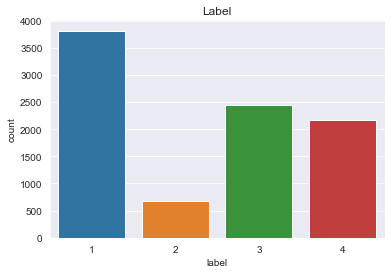

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")
sns.countplot(dataset.label).set_title('Label')

In [22]:
dataset.isna().sum()

label                 0
text                  0
with_stop_words       0
without_stop_words    0
concat                0
dtype: int64

In [23]:
dataset.reset_index(drop=True, inplace=True)

In [24]:
dataset

,label,text,with_stop_words,without_stop_words,concat
0,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ ...,"[tsđh, thông báo, tổ chức, lớp, ôn tập, chuẩn ...","[tsđh, thông báo, tổ chức, lớp, ôn tập, tuyển ...",tsđh thông báo tổ chức lớp ôn tập chuẩn bị tuy...
1,1,💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn P...,"[giao lưu, cùng, nhà báo, nhà thơ, nguyễn phon...","[giao lưu, nhà báo, nhà thơ, nguyễn phong việt...",giao lưu cùng nhà báo nhà thơ nguyễn phong việ...
2,1,Phòng Công tác Sinh viên thông tin đến sinh vi...,"[phòng, ctsv, thông tin, đến, sinh viên, về, t...","[phòng, ctsv, thông tin, sinh viên, làm việc, ...",phòng ctsv thông tin đến sinh viên về thời gia...
3,1,🔬 Các chuyên ngành đào tạo trường Đại học Kans...,"[các, chuyên ngành, đào tạo, trường, đại học, ...","[chuyên ngành, đào tạo, trường, đại học, kansa...",các chuyên ngành đào tạo trường đại học kansai...
4,1,👉 Bật mí với các bạn một chương trình vô cùng ...,"[bật mí, với, các, bạn, một, chương trình, vô ...","[bật mí, chương trình, vô cùng, hấp dẫn, diễn,...",bật mí với các bạn một chương trình vô cùng hấ...
...,...,...,...,...,...
9089,1,Bạn này vừa đến Trường nộp Giấy kết quả thi TH...,"[bạn, này, vừa, đến, trường, nộp, giấy, kết qu...","[trường, nộp, giấy, kết quả, thi, thpt, quốc g...",bạn này vừa đến trường nộp giấy kết quả thi th...
9090,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để ki...,"[các, em, nhỏ, nhớ, đi, nhé, chị, share, để, k...","[đi, share, kiểu, khai trương, group, share, m...",các em nhỏ nhớ đi nhé chị share để kiểu khai t...
9091,3,# chào mình đỗ ktpm clc ... bác nào chung khoa...,"[chào, mình, đỗ, ktpm, clc, bác, nào, chung, k...","[chào, đỗ, ktpm, clc, khoa, làm quen, mail, ed...",chào mình đỗ ktpm clc bác nào chung khoa làm q...
9092,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng...","[chào, các, bạn, phòng, ctsv, đã, đăng tải, hư...","[chào, phòng, ctsv, đăng tải, hướng dẫn, tân, ...",chào các bạn phòng ctsv đã đăng tải hướng dẫn ...


In [25]:
dataset_out = dataset.drop(columns=['concat'])

In [26]:
dataset_out

,label,text,with_stop_words,without_stop_words
0,1,[TSSĐH]-THÔNG BÁO TỔ CHỨC LỚP ÔN TẬP CHUẨN BỊ ...,"[tsđh, thông báo, tổ chức, lớp, ôn tập, chuẩn ...","[tsđh, thông báo, tổ chức, lớp, ôn tập, tuyển ..."
1,1,💗💗 Giao lưu cùng Nhà báo- Nhà thơ Nguyễn P...,"[giao lưu, cùng, nhà báo, nhà thơ, nguyễn phon...","[giao lưu, nhà báo, nhà thơ, nguyễn phong việt..."
2,1,Phòng Công tác Sinh viên thông tin đến sinh vi...,"[phòng, ctsv, thông tin, đến, sinh viên, về, t...","[phòng, ctsv, thông tin, sinh viên, làm việc, ..."
3,1,🔬 Các chuyên ngành đào tạo trường Đại học Kans...,"[các, chuyên ngành, đào tạo, trường, đại học, ...","[chuyên ngành, đào tạo, trường, đại học, kansa..."
4,1,👉 Bật mí với các bạn một chương trình vô cùng ...,"[bật mí, với, các, bạn, một, chương trình, vô ...","[bật mí, chương trình, vô cùng, hấp dẫn, diễn,..."
...,...,...,...,...
9089,1,Bạn này vừa đến Trường nộp Giấy kết quả thi TH...,"[bạn, này, vừa, đến, trường, nộp, giấy, kết qu...","[trường, nộp, giấy, kết quả, thi, thpt, quốc g..."
9090,1,Các em nhỏ nhớ đi MHX2020 nha\nChị share để ki...,"[các, em, nhỏ, nhớ, đi, nhé, chị, share, để, k...","[đi, share, kiểu, khai trương, group, share, m..."
9091,3,# chào mình đỗ ktpm clc ... bác nào chung khoa...,"[chào, mình, đỗ, ktpm, clc, bác, nào, chung, k...","[chào, đỗ, ktpm, clc, khoa, làm quen, mail, ed..."
9092,1,"Chào các bạn, phòng Công tác Sinh viên đã đăng...","[chào, các, bạn, phòng, ctsv, đã, đăng tải, hư...","[chào, phòng, ctsv, đăng tải, hướng dẫn, tân, ..."


In [27]:
dataset_out.to_csv('uit-post-dataset.csv', index=False)